# Predict Credit Card Defaulters

In this Project we need to predict the credit card defaulter(not paying the bill on time etc.) using the dataset that we have 

in any data science project, there is so many steps that we need to take in mind and also so many posibilities to do same thing 
in defferent way

start with importing the basic and required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

importing the dataset 

In [2]:
dataset=pd.read_csv('F:/data_science/python/ML/projects/credit_card-defaulters_dataset.csv')

In [3]:
dataset.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [4]:
dataset.shape

(30000, 16)

Now we can see that there is so many different null values in dataset and we can not directly apply this data to ML model 
so to take care of this we need to do some preprocessing on this data to handle this data 

In [5]:
dataset.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

# Data Preprocessing (Feature Engineering)

In [6]:
nul_feature=[feature for feature in dataset.columns if dataset[feature].isnull().sum() >=1]

In [7]:
len(nul_feature)

12

There is total 12 feature in dataset which are having the null value

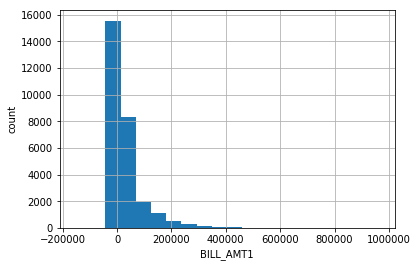

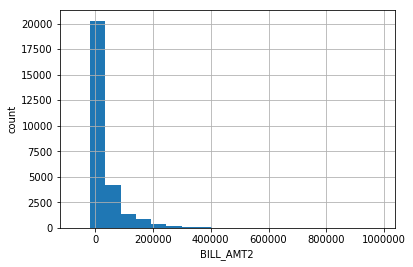

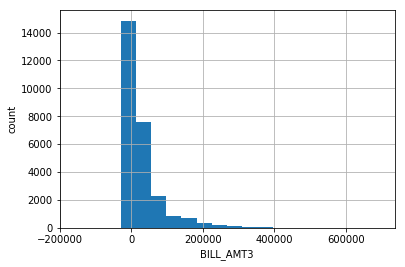

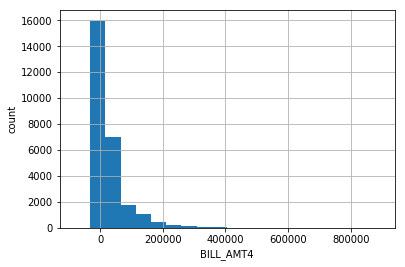

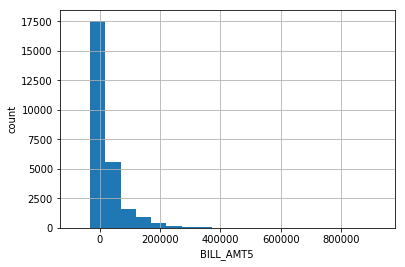

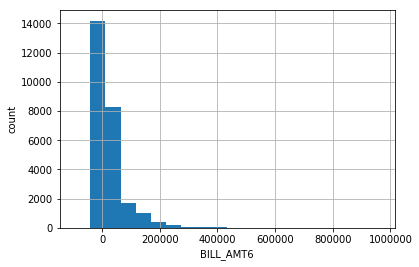

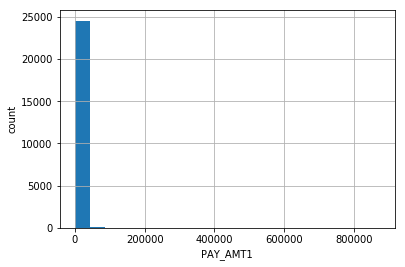

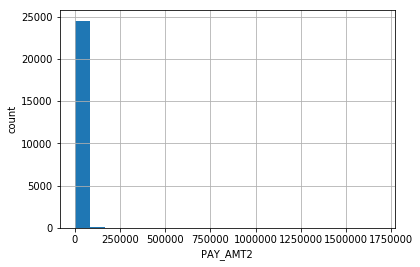

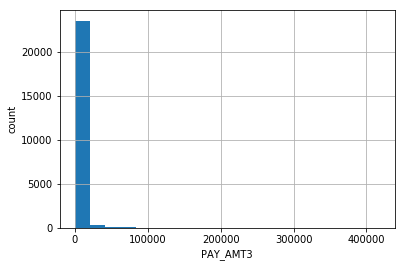

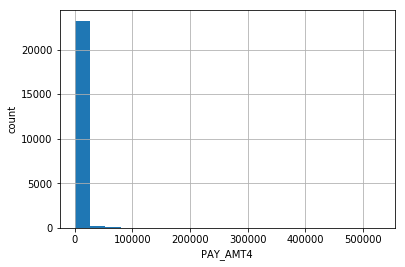

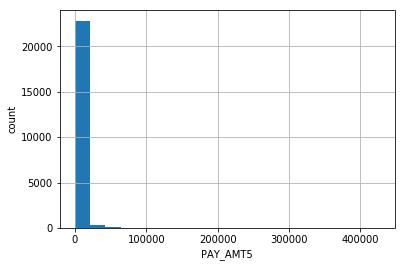

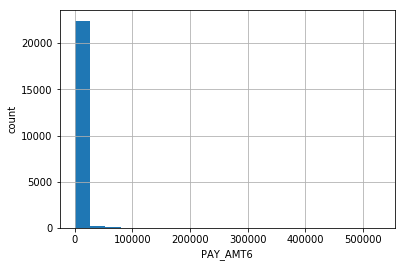

In [8]:
for feature in nul_feature:
    data=dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

here the data is not normally distributed , instead it is skweed or randomly distbuted .

so we need to convert it to the normally distributed data to take its advantages

using a log-normal function to convert it to nurmally distributed data

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


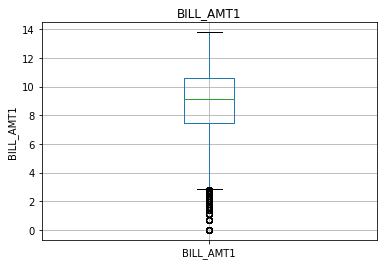

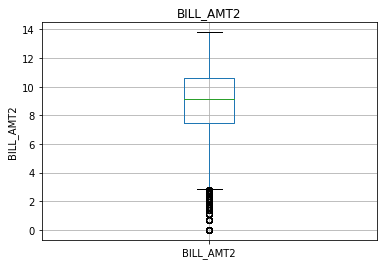

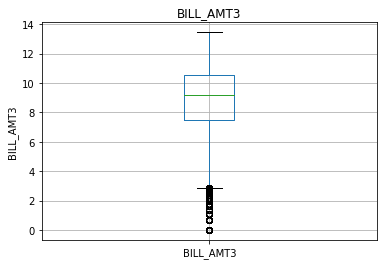

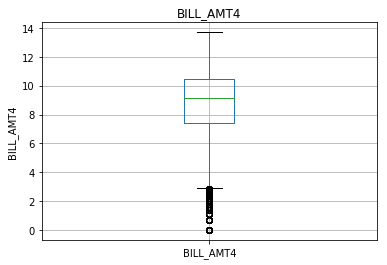

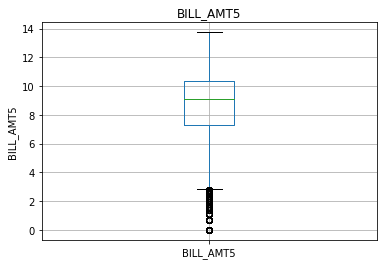

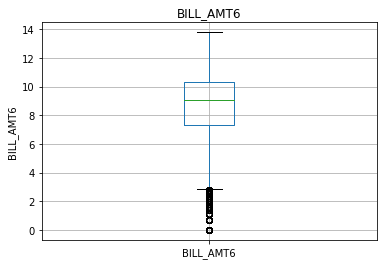

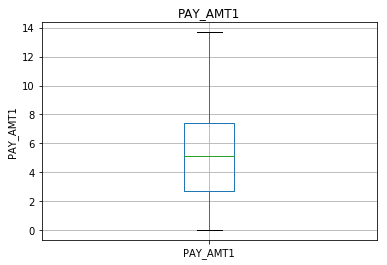

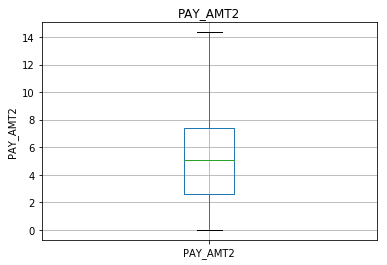

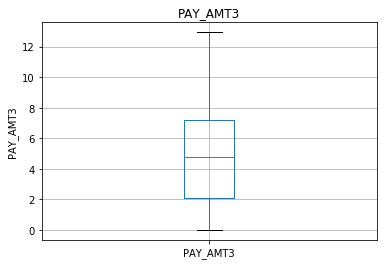

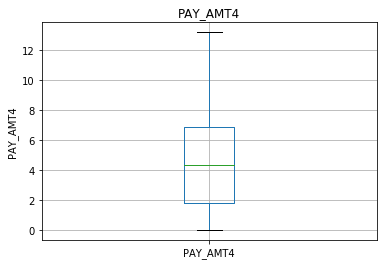

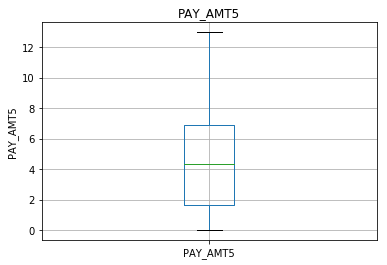

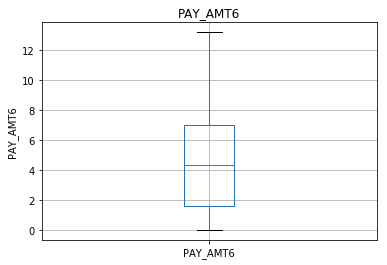

In [10]:
for feature in nul_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

here we can see that the BILL_amts are having the much more outliers where PAY_AMT having nearly zero outliers

# Handline the Missing Value

In [11]:
data=dataset.copy() 

In [12]:
data.shape

(30000, 16)

In [13]:
data.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

Taking out the null feature 

In [14]:
bill_feature=[feature for feature in nul_feature if 'BILL' in feature]

In [15]:
bill_feature

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [16]:
pay_feature=[feature for feature in nul_feature if 'PAY' in feature]

In [17]:
pay_feature

['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [18]:
for feature in bill_feature:
    data[feature]=data[feature].fillna(data[feature].median())

In [19]:
for feature in pay_feature:
    data[feature]=data[feature].fillna(data[feature].mean())

here i have replaced null values of bill_feature with the median because there is many outliers in data for this

and i have replaced null values of pay_feature with the mode because there were no outliers in data for this

In [20]:
data.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

# Dividing the Data

In [21]:
target=data[['Default Status']]
target.head()

,Default Status
0,Default
1,Default
2,Not Default
3,Not Default
4,Not Default


In [24]:
data.drop(['Default Status','ID'],axis=1,inplace=True)

In [25]:
data.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=2)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 14)
(9000, 14)
(21000, 1)
(9000, 1)


converting dependent variable to numerical variable 

In [29]:
from sklearn import preprocessing

In [30]:
label_encoder=preprocessing.LabelEncoder()
y_train['label']=label_encoder.fit_transform(y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
y_train.head()

,Default Status,label
12614,Not Default,1
5357,Not Default,1
4020,Not Default,1
24851,Not Default,1
23961,Default,0


In [32]:
y_train.drop('Default Status',axis=1,inplace=True)
y_train.head()

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,label
12614,1
5357,1
4020,1
24851,1
23961,0


In [33]:
y_test['label']=label_encoder.fit_transform(y_test)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
y_test.drop('Default Status',axis=1,inplace=True)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
x_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
12614,53.0,39,398763.0,396324.0,355438.0,317549.0,29182.0,29262.0,1716.0,1412.0,111.000000,115.000000,1112.0,96.0
5357,27.0,27,216.0,1183.0,137.0,8.0,498.0,1181.0,2.0,25.0,2584.508988,41.000000,12.0,5.0
4020,5.0,23,49798.0,5795.0,515.0,9658.0,111.0,9345.0,2193.0,24.0,33.000000,492.000000,332.0,5.0
24851,2.0,41,198.0,182.0,5647.0,364.0,182.0,182.0,182.0,5647.0,2584.508988,2250.186122,182.0,3829.0
23961,5.0,25,4698.0,4789.0,494.0,29662.0,2836.0,28831.0,191.0,2141.0,1763.000000,1161.000000,177.0,1167.0


# Feature Scalling

In [36]:
from sklearn import preprocessing

In [37]:
scaler=preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(scaled_df, columns=x_train.columns)

In [38]:
scaler=preprocessing.MinMaxScaler()
scaled_test = scaler.fit_transform(x_test)
scaled_test = pd.DataFrame(scaled_test, columns=x_train.columns)

In [39]:
scaled_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.675325,0.500000,0.708446,0.628728,0.530051,0.561781,0.132779,0.133306,0.001963,0.000838,0.000263,0.000216,0.002929,0.000270
1,0.337662,0.333333,0.198548,0.095719,0.035598,0.114561,0.082539,0.097018,0.000001,0.000014,0.006187,0.000076,0.000029,0.000011
2,0.051948,0.277778,0.261982,0.101940,0.036124,0.128152,0.081861,0.107568,0.002509,0.000014,0.000077,0.000928,0.000873,0.000011
3,0.012987,0.527778,0.198525,0.094368,0.043266,0.115062,0.081986,0.095727,0.000207,0.003352,0.006187,0.004253,0.000477,0.010897
4,0.051948,0.305556,0.204282,0.100583,0.036095,0.156325,0.086634,0.132749,0.000218,0.001271,0.004219,0.002193,0.000464,0.003319


# ML Model

Here i have used a Random forest because it gave me a  high accuracy comapred to other algorithams 

In [41]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
model=RandomForestClassifier(n_estimators=100)

In [43]:
model.fit(scaled_df,y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
pred_y=model.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy=accuracy_score(y_test,pred_y)

In [57]:
accuracy

0.7762222222222223

we got a 77.6 per. accuracy but stil there is lot to do to increase this accuracy